In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("Bank_data.csv")

In [3]:
dataset.head(4)

,loan_id,married,gender,dependency,Self_Employee,Applicant,coapplicant,Loan_amount,creadit_his,propert,loan_status
0,LN1000,Yes,Female,0,Yes,17154.0,13688.0,133487.0,0.0,Rural,Rejected
1,LN1001,Yes,Male,0,Yes,NaN,2995.0,50849.0,1.0,Urban,Rejected
2,LN1002,Yes,Male,1,No,21923.0,3046.0,85520.0,0.0,Semiurban,Rejected
3,LN1003,NaN,Female,3+,No,19718.0,14947.0,NaN,1.0,Rural,Rejected


In [4]:
dataset["coapplicant"].isnull().sum()

np.int64(27)

In [5]:
dataset["coapplicant"].fillna("bfill", inplace=True)

C:\Users\lenovo\anaconda3\ipykernel_13696\570315203.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset["coapplicant"].fillna("bfill", inplace=True)
C:\Users\lenovo\anaconda3\ipykernel_13696\570315203.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'bfill' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  dataset["coapplicant"].fillna("bfill", inplace=True)


In [6]:
dataset.isnull().sum()

loan_id           0
married          23
gender           32
dependency       17
Self_Employee    25
Applicant        38
coapplicant       0
Loan_amount      32
creadit_his      26
propert          27
loan_status      25
dtype: int64

ValueError: Unable to parse string "bfill" at position 37

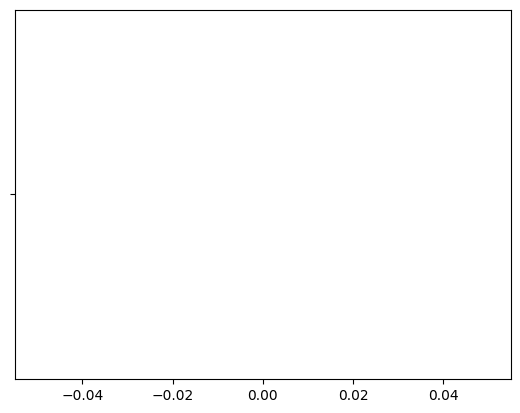

In [8]:
sns.boxplot(x="coapplicant", data=dataset)

In [ ]:
dataset["coapplicant"].fillna(dataset["coapplicant"].mode()[0], inplace=True)

C:\Users\lenovo\anaconda3\ipykernel_7196\4245028344.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset["coapplicant"].fillna(dataset["coapplicant"].mode()[0], inplace=True)


In [ ]:
dataset["coapplicant"] = pd.to_numeric(dataset["coapplicant"], errors="coerce")  # Convert to numeric


In [ ]:
q1 = dataset["coapplicant"].quantile(0.25) #find the 25th percentile q1
q3 = dataset["coapplicant"].quantile(0.75) #find the 75th percentile q3

(np.float64(3942.0), np.float64(11055.5))

In [ ]:
IQR = q3-q1 # calculate interquartile range
IQR

np.float64(7113.5)

In [ ]:
min_range = q1-(1.5*IQR)
max_range = q3+(1.5*IQR) # 99.3% of the data falls within this range
min_range, max_range

(np.float64(-6728.25), np.float64(21725.75))

In [ ]:
new_dataset = dataset[dataset["coapplicant"]<= max_range] #Remove rows where coapplicant is greater than max_range

In [ ]:
new_dataset.shape

(618, 11)